**DESARROLLO TAREA 17 MATEMÁTICAS DISCRETAS 2 - 2024-1**

**Profesor:** Arles Ernesto Rodríguez Portela

**Estudiante:** Omar David Toledo Leguizamón

# Tarea 17

1. Encuentre la solución general a la ecuación en diferencias en términos de $u_1$ dada por $u_n=2u_{n−1}$

2. Encuentre la solución general a la ecuación en diferencias en términos de $u_1$ dada por $u_n−3u_{n−1}=3$

3. La población de un país es de $12.5$ millones. La tasa de nacimiento es de $0.04$ y la de mortalidad es $0.03$. Se estima que cada año el país recibe $50.000$ inmigrantes. Estime la población en $20$ años.



# Desarrollo

## 1. Encuentre la solución general a la ecuación en diferencias en términos de $u_1$ dada por $u_n=2u_{n−1}$

Dado que la ecuación en diferencias, procederemos a realizar distintas iteraciones de tal forma que obtengamos el elemento $u_1$:

$$u_n = 2u_{n-1} = 2(2u_{n-2})= 2(2(2u_{n-2})) = ... = 2^{n-1}u_1$$

Con esta expansión, ya pudimos obtener la expresión en términos de $u_1$. Con el fin de comprobar el resultado, se graficará la expresión obtenida junto con la expresión inicial.

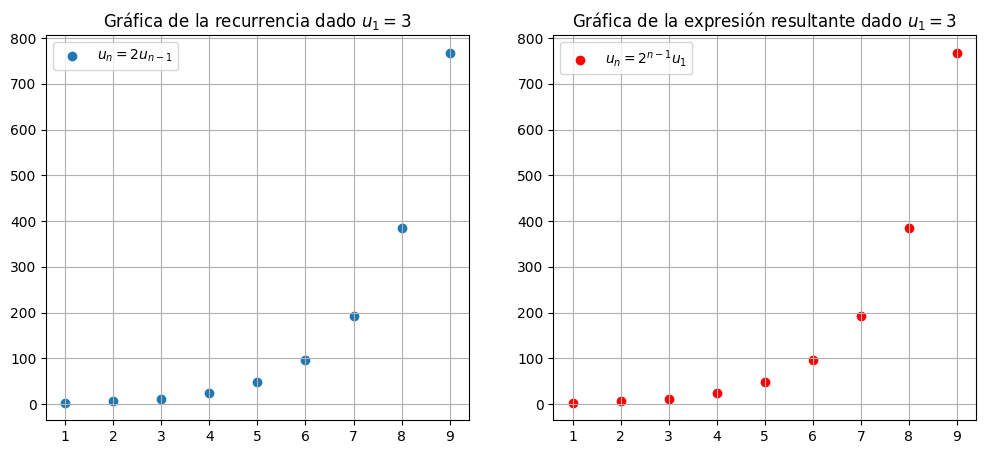

In [89]:
import numpy as np
import matplotlib.pyplot as plt
u1 = 3
#Definimos las dos expresiones
def u(n): return u1 if n==1 else 2*u(n-1)
u_n = lambda n: u1*2**(n-1)
domain = np.arange(1,10)
rec = np.array([u(n) for n in domain]).astype(np.int32)
res = u_n(domain).astype(np.int32)
#Verificamos que el resultado sea el mismo
assert (rec==res).all()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(domain,rec,label='$u_{n} = 2u_{n-1}$')
plt.grid(True)
plt.title(f'Gráfica de la recurrencia dado $u_1 = {u1}$')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(domain,res,label='$u_{n} = 2^{n-1}u_1$',color='red')
plt.grid(True)
plt.title(f'Gráfica de la expresión resultante dado $u_1 = {u1}$')
plt.legend()
plt.show()

Dado que los resultados obtenidos son idénticos, podemos concluir que:

$$\therefore \quad u_n=2u_{n−1} \,\, \Longrightarrow \,\, u_n = 2^{n-1} u_1$$

## 2. Encuentre la solución general a la ecuación en diferencias en términos de $u_1$ dada por $u_n−3u_{n−1}=3$

Dado que la ecuación en diferencias, procederemos a realizar distintas iteraciones de tal forma que obtengamos el elemento $u_1$:

\begin{array}{rcl}
    u_n − 3u_{n−1}=3 & \Longrightarrow & u_n=3u_{n−1} +3 \\
                     & \Longrightarrow & u_n=3(3u_{n−2} +3) +3 \\
                     & \Longrightarrow & u_n=3(3(3u_{n−3} +3) +3) +3 \\
                     & \vdots &  \\
                     & \Longrightarrow & u_n= 3^{n-1} u_{1} + (3^{n-1} + 3^{n-2} + ... + 3^{2} + 3)\\
                     & \Longrightarrow & u_n= 3^{n-1} u_{1} + \sum^{n-1}_{k=1} 3^{k}\\ \\
                     & \Longrightarrow & u_n= 3^{n-1} u_{1} + 3\left(\dfrac{1-3^{n-1}}{1-3}\right)\\
                     & \Longrightarrow & u_n= 3^{n-1} u_{1} + \dfrac{3}{2}\left(3^{n-1}-1\right)\\
\end{array}

Con esta expansión, ya pudimos obtener la expresión en términos de $u_1$. Con el fin de comprobar el resultado, se graficará la expresión obtenida junto con la expresión inicial.

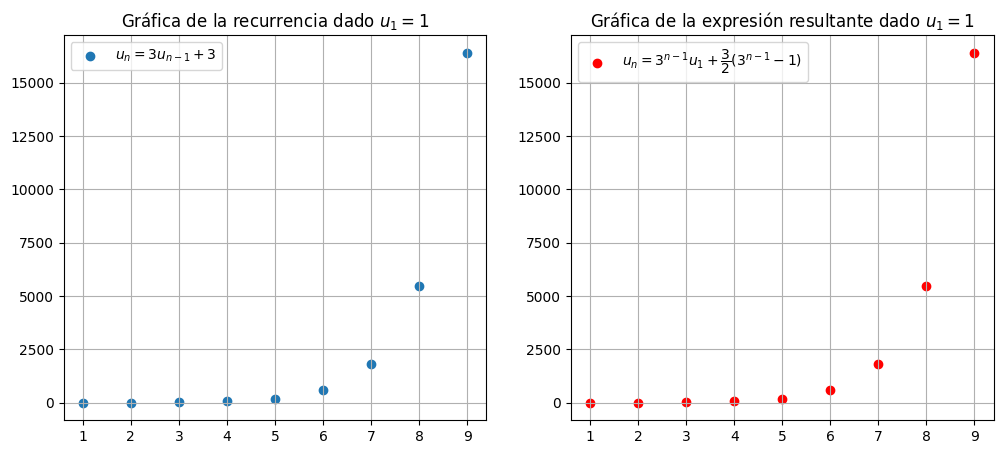

In [90]:
import numpy as np
import matplotlib.pyplot as plt
u1 = 1
#Definimos las dos expresiones
def u(n): return u1 if n==1 else 3*u(n-1) + 3
u_n = lambda n: u1*3**(n-1) + 3/2*(3**(n-1) - 1)
domain = np.arange(1,10)
rec = np.array([u(n) for n in domain],dtype='int')
res = u_n(domain).astype(np.int32)
#Verificamos que el resultado sea el mismo
assert (rec==res).all()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(domain,rec,label='$u_n=3u_{n−1} +3$')
plt.grid(True)
plt.title(f'Gráfica de la recurrencia dado $u_1 = {u1}$')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(domain,res,label='$u_n= 3^{n-1} u_{1} + \dfrac{3}{2}\left(3^{n-1}-1\\right)$',color='red')
plt.grid(True)
plt.title(f'Gráfica de la expresión resultante dado $u_1 = {u1}$')
plt.legend()
plt.show()

Dado estos resultados idénticos, podemos concluir que:

$$\therefore \quad u_n−3u_{n−1}=3 \,\, \Longrightarrow \,\, u_n= 3^{n-1} u_{1} + \dfrac{3}{2}\left(3^{n-1}-1\right)$$

## 3. La población de un país es de $12.5$ millones. La tasa de nacimiento es de $0.04$ y la de mortalidad es $0.03$. Se estima que cada año el país recibe $50.000$ inmigrantes. Estime la población en $20$ años.

Con el fin de estimar el cambio poblacional del país mencionado se establecerá una ecuación en diferencias que determinará el cambio poblacional en cada año. Para esto tomaremos el siguiente esquema definiendo $d$ como la tasa de mortalidad, $b$ la tasa de natalidad y $M$ la cantidad de migrantes por año:

$$P_{t+1} = P_{t} \cdot (1 - d + b) + M$$

Adaptandolo a nuestro problema, obtenemos la siguiente ecuación en diferencias (Definiendo la unidad en millones de habitantes):

$$P_{t+1} =  P_{t} \cdot (1 - 0.03 + 0.04) + 0.05 =  1.01 \cdot P_{t} + 0.05 \quad \quad P_{0} = 12.5$$

Procedemos a solucionar la ecuación mediante el método de iteraciones:

\begin{array}{rcl}
    P_{t} &=&  1.01 P_{t-1} + 0.05\\
          &=&  1.01 (1.01 P_{t-2} + 0.05) + 0.05\\
          &=&  1.01 (1.01 (1.01 P_{t-3} + 0.05) + 0.05) + 0.05\\
          &\vdots&  \\
          &=&  1.01^{t} P_{0} + 0.05(1.01^{t-1} + 1.01^{t-2}+1.01^{t-3} + ... + 1.01 + 1)\\ \\
          &=&  1.01^{t} P_{0} + 0.05\sum_{k=0}^{t-1} 1.01^k\\ \\
          &=&  1.01^{t} P_{0} + 0.05\left( \dfrac{1-1.01^t}{1-1.01}\right)\\
          &=&  1.01^{t} P_{0} + 5\left(1.01^t-1\right)\\
          &=&  1.01^{t} (P_{0}+5) - 5\\
\end{array}

Dado este resultado, solo debemos reemplazar por nuestro valor inicial poblacional y obtenemos la siguiente expresión:

$$P_t = 1.01^{t} (12.5+5) - 5= 1.01^{t} (17.5) - 5$$

Finalmente, procedemos a calcular la población tras 20 años del periodo inicial:

$$P_{20} = 1.01^{20} (17.5) - 5 = 16.353326$$

Antes de concluir, verificamos el resultado a través de un esquema computacional:

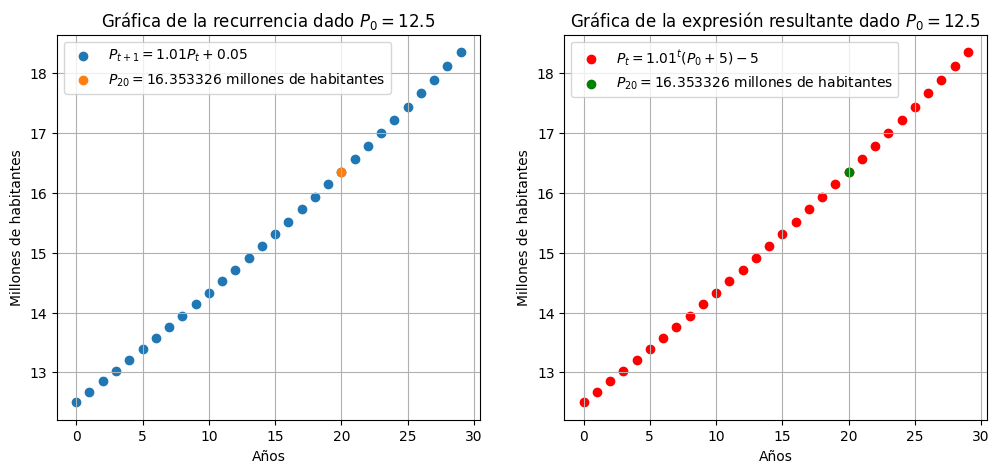

In [145]:
import numpy as np
import matplotlib.pyplot as plt
P0 = 12.5
#Definimos las dos expresiones
def P(t): return P0 if t==0 else 1.01*P(t-1)+0.05
P_t = lambda t: (1.01**t)*(P0+5)-5
domain = np.arange(0,30)
rec = np.array([P(t) for t in domain])
res = P_t(domain)
#Verificamos que el resultado sea el mismo (Por desfase decimal definimos una tolerancia cercana a 0)
assert (np.abs(rec-res)<=1e-12).all()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(domain,rec,label='$P_{t+1} =  1.01 P_{t} + 0.05$')
plt.scatter(domain[20],rec[20],label=f'$P_{{20}} =  {rec[20]:.6f}$ millones de habitantes')
plt.grid(True)
plt.xlabel('Años')
plt.ylabel('Millones de habitantes')
plt.title(f'Gráfica de la recurrencia dado $P_0 = {P0}$')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(domain,res,label='$P_t = 1.01^{t} (P_0 + 5) - 5$',color='red')
plt.scatter(domain[20],res[20],color='green',label=f'$P_{{20}} =  {rec[20]:.6f}$ millones de habitantes')
plt.grid(True)
plt.xlabel('Años')
plt.ylabel('Millones de habitantes')
plt.title(f'Gráfica de la expresión resultante dado $P_0 = {P0}$')
plt.legend()
plt.show()

Podemos concluir que:

$$\therefore \text{Después de 20 años, habrán 16.353326 millones de habitantes} $$